 <h1><center><font size="6">CNN with Tensorflow|Keras for Fashion MNIST</font></center></h1>


<center><img src="https://research.zalando.com/project/fashion_mnist/fashion_mnist/img/fashion-mnist-sprite.png" width="600"></img></center>


# <a id='0'>Content</a>

- <a href='#1'>Introduction</a>  
- <a href='#2'>Load packages</a>  
- <a href='#3'>Read the data</a>  
- <a href='#4'>Data exploration</a>
    - <a href='#41'>Class distribution</a>
    - <a href='#42'>Images samples</a>
- <a href='#5'>Model</a>  
    - <a href='#51'>Prepare the model</a>  
    - <a href='#52'>Train the model</a>  
    - <a href='#53'>Test prediction accuracy</a>   
    - <a href='#54'>Validation accuracy and loss</a>   
    - <a href='#55'>Add Dropout layers to the model</a>  
    - <a href='#56'>Re-train the model</a>   
    - <a href='#57'>Check validation accuracy and loss with the new model</a>    
    - <a href='#58'>Prediction accuracy with the new model </a>   
- <a href='#6'>Visualize the classified images</a>  
    - <a href='#61'>Correctly classified images</a>   
    - <a href='#62'>Incorrectly classified images</a>   
- <a href='#7'>Conclusions</a>
- <a href='#8'>References</a>

# <a id="1">Introduction</a>  


## Dataset

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.


## Content

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total.   

Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.   

The training and test data sets have 785 columns.   

The first column consists of the class labels (see above), and represents the article of clothing. 

The rest of 784 columns (1-785) contain the pixel-values of the associated image.

# <a id="2">Load packages</a>

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from IPython.display import SVG

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

## Parameters

In [14]:
IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 10
TEST_SIZE = 0.2
RANDOM_STATE = 2018
#Model
NO_EPOCHS = 50
BATCH_SIZE = 128

# <a id="3">Read the data</a>

There are 10 different classes of images, as following: 

* **0**: **T-shirt/top**;   
* **1**: **Trouser**;   
* **2**: **Pullover**;   
* **3**: **Dress**;
* **4**: **Coat**;
* **5**: **Sandal**;
* **6**: **Shirt**;
* **7**: **Sneaker**;
* **8**: **Bag**;
* **9**: **Ankle boot**.

Image dimmensions are **28**x**28**.   

The train set and test set are given in two separate datasets.


In [15]:
train_file = "./archive/fashion-mnist_train.csv"
test_file  = "./archive/fashion-mnist_test.csv"

train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

# <a id="4">Data exploration</a>

![](http://)The dimmension of the original  train,  test set are as following:

In [16]:
print("Fashion MNIST train -  rows:",train_data.shape[0]," columns:", train_data.shape[1])
print("Fashion MNIST test -  rows:",test_data.shape[0]," columns:", test_data.shape[1])

Fashion MNIST train -  rows: 60000  columns: 785
Fashion MNIST test -  rows: 10000  columns: 785


## <a id="41">Class distribution</a>

Let's see how many number of images are in each class. We start with the train set.

### Train set images class distribution

In [29]:
# Create a dictionary for each type of label 
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

def get_classes_distribution(data):
    # Get the count for each label
    label_counts = data["label"].value_counts()

    # Get total number of samples
    total_samples = len(data)


    # Count the number of items in each class
    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} or {}%".format(label, count, percent))

get_classes_distribution(train_data)

Pullover            :   6000 or 10.0%
Ankle Boot          :   6000 or 10.0%
Shirt               :   6000 or 10.0%
T-shirt/top         :   6000 or 10.0%
Dress               :   6000 or 10.0%
Coat                :   6000 or 10.0%
Sandal              :   6000 or 10.0%
Bag                 :   6000 or 10.0%
Sneaker             :   6000 or 10.0%
Trouser             :   6000 or 10.0%


The classes are equaly distributed in the train set (10% each). Let's check the same for the test set.    
Let's also plot the class distribution.



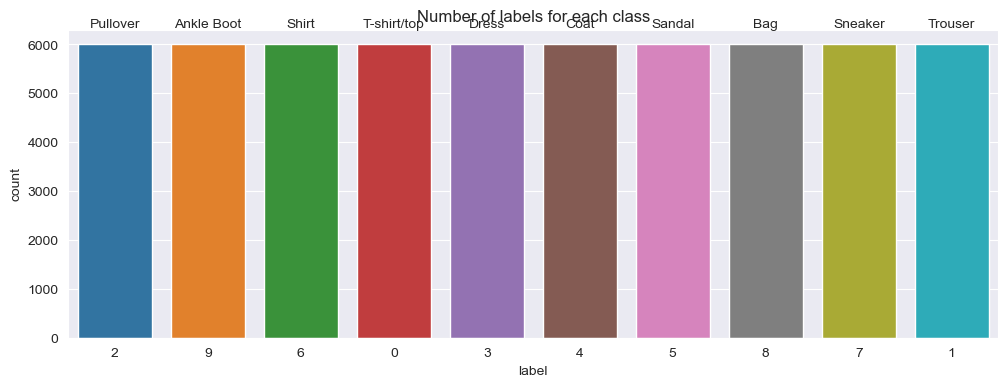

In [32]:
def plot_label_per_class(data):
    f, ax = plt.subplots(1,1, figsize=(12,4))
    g = sns.countplot(x='label', data=data, order=data['label'].value_counts().index)
    g.set_title("Number of labels for each class")

    for p, label in zip(g.patches, data['label'].value_counts().index):
        height = p.get_height()
        g.annotate(f'{labels[label]}',  # Text to annotate
                   (p.get_x() + p.get_width() / 2.0, height),  # Position
                   ha='center', va='bottom',  # Center alignment
                   textcoords="offset points",  # Offset text coordinates for positioning
                   xytext=(0,10))  # Move text slightly above on the bar

    plt.show()

plot_label_per_class(train_data)


### Test set images class distribution

In [33]:
get_classes_distribution(test_data)

T-shirt/top         :   1000 or 10.0%
Trouser             :   1000 or 10.0%
Pullover            :   1000 or 10.0%
Dress               :   1000 or 10.0%
Bag                 :   1000 or 10.0%
Shirt               :   1000 or 10.0%
Sandal              :   1000 or 10.0%
Coat                :   1000 or 10.0%
Sneaker             :   1000 or 10.0%
Ankle Boot          :   1000 or 10.0%


Also in the test set the 10 classes are equaly distributed (10% each).  

Lets' also plot the class distribution.

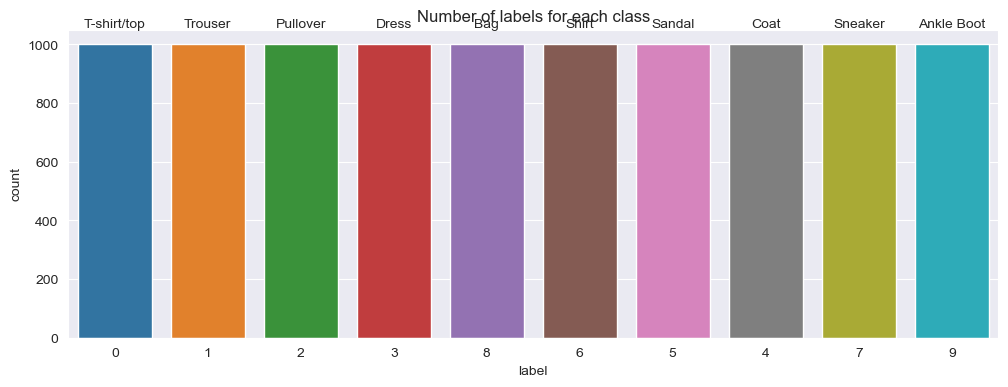

In [34]:
plot_label_per_class(test_data)

## <a id="42">Sample images</a>

### Train set images

Let's plot some samples for the images.   
We add labels to the train set images, with the corresponding fashion item category.  

In [38]:
def sample_images_data(data):
    # An empty list to collect some samples
    sample_images = []
    sample_labels = []

    # Iterate over the keys of the labels dictionary defined in the above cell
    for k in labels.keys():
        # Get four samples for each category
        samples = data[data["label"] == k].head(4)
        # Append the samples to the samples list
        for j, s in enumerate(samples.values):
            # First column contain labels, hence index should start from 1
            img = np.array(samples.iloc[j, 1:]).reshape(IMG_ROWS,IMG_COLS)
            sample_images.append(img)
            sample_labels.append(samples.iloc[j, 0])

    print("Total number of sample images to plot: ", len(sample_images))
    
    return sample_images, sample_labels

train_sample_images, train_sample_labels = sample_images_data(train_data)

Total number of sample images to plot:  40


Let's now plot the images.   
The labels are shown above each image.

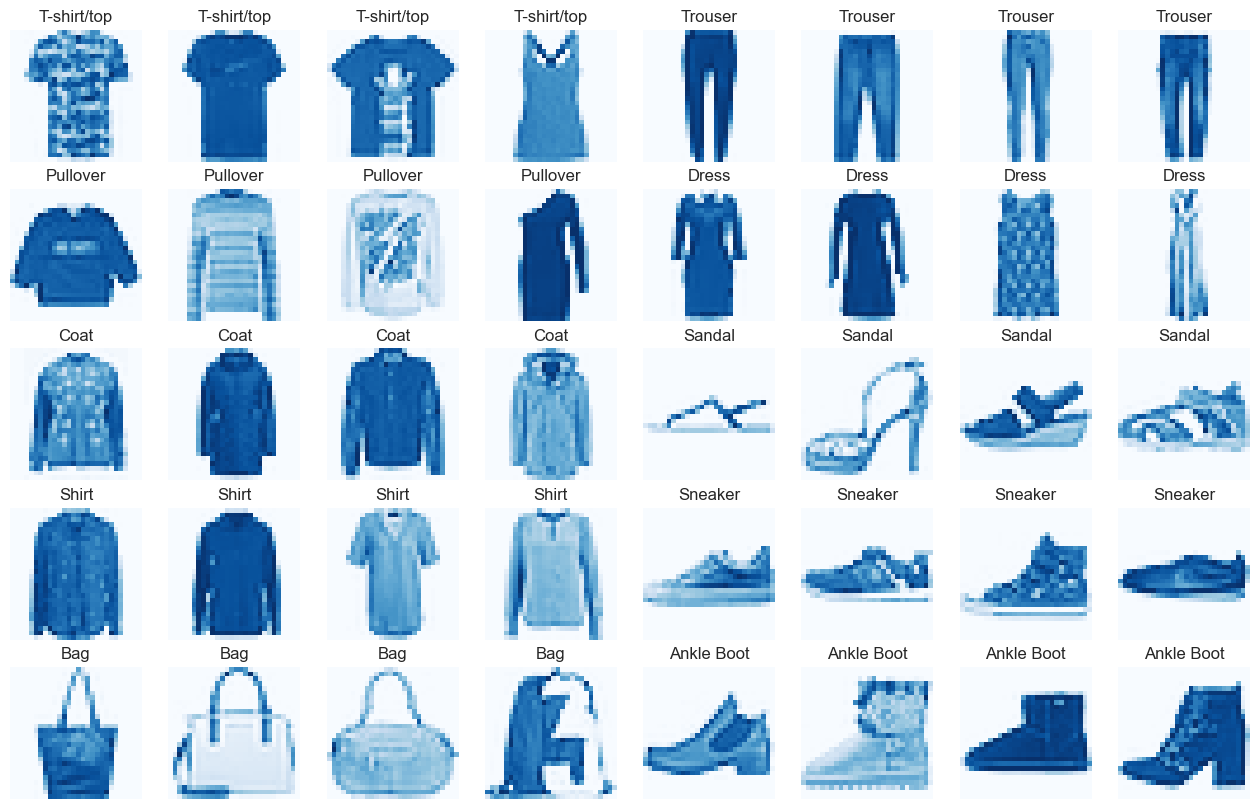

In [40]:
def plot_sample_images(data_sample_images,data_sample_labels,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(5,8, figsize=(16,10))

    for i, img in enumerate(data_sample_images):
        ax[i//8, i%8].imshow(img, cmap=cmap)
        ax[i//8, i%8].axis('off')
        ax[i//8, i%8].set_title(labels[data_sample_labels[i]])
    plt.show()    
    
plot_sample_images(train_sample_images,train_sample_labels, "Blues")

### Test set images

Let's plot now a selection of the test set images.  
Labels are as well added (they are known).  

Total number of sample images to plot:  40


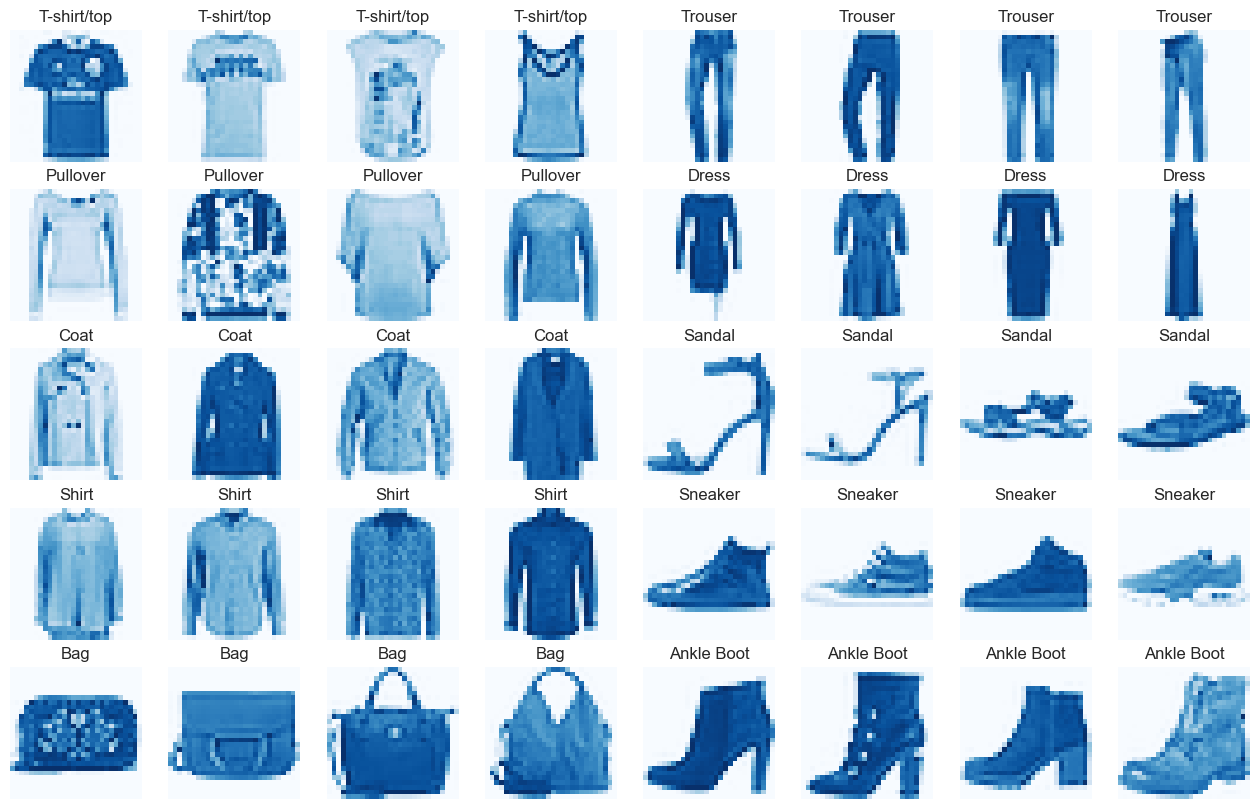

In [41]:
test_sample_images, test_sample_labels = sample_images_data(test_data)
plot_sample_images(test_sample_images,test_sample_labels)

# <a id="5">Model</a>

We start with preparing the model.

## <a id="51">Prepare the model</a>

## Data preprocessing

First we will do a data preprocessing to prepare for the model.

We reshape the columns  from (784) to (28,28,1). We also save label (target) feature as a separate vector.

In [42]:
# data preprocessing
def data_preprocessing(raw):
    out_y = keras.utils.to_categorical(raw.label, NUM_CLASSES)
    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, IMG_ROWS, IMG_COLS, 1)
    out_x = x_shaped_array / 255
    return out_x, out_y

We process both the train_data and the test_data

In [43]:
# prepare the data
X, y = data_preprocessing(train_data)
X_test, y_test = data_preprocessing(test_data)

## Split train in train and validation set

We further split the train set in train and validation set. The validation set will be 20% from the original train set, therefore the split will be train/validation of 0.8/0.2.

In [44]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

The dimmension of the processed train, validation and test set are as following:

In [45]:
print("Fashion MNIST train -  rows:",X_train.shape[0]," columns:", X_train.shape[1:4])
print("Fashion MNIST valid -  rows:",X_val.shape[0]," columns:", X_val.shape[1:4])
print("Fashion MNIST test -  rows:",X_test.shape[0]," columns:", X_test.shape[1:4])

Fashion MNIST train -  rows: 48000  columns: (28, 28, 1)
Fashion MNIST valid -  rows: 12000  columns: (28, 28, 1)
Fashion MNIST test -  rows: 10000  columns: (28, 28, 1)


Let's check the class inbalance for the rsulted training set.

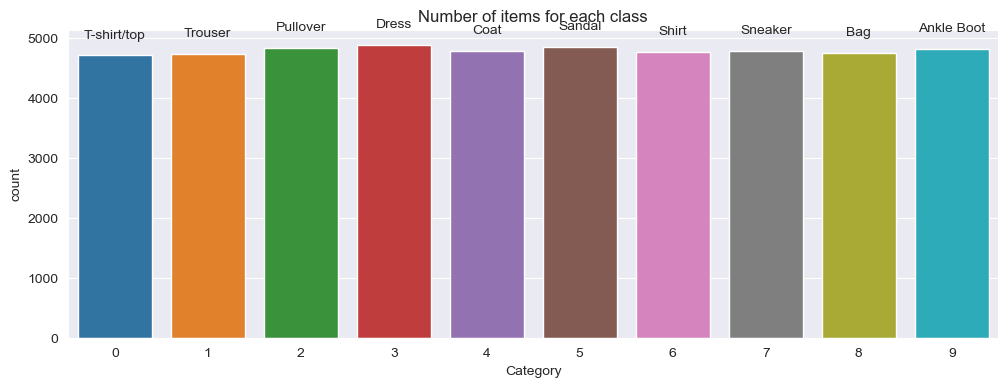

In [48]:
def plot_count_per_class(yd):
    ydf = pd.DataFrame(yd)
    f, ax = plt.subplots(1,1, figsize=(12,4))
    g = sns.countplot(x=0, data=ydf, order=np.arange(0, 10))
    g.set_title("Number of items for each class")
    g.set_xlabel("Category")

    for p, label in zip(g.patches, np.arange(0, 10)):
        height = p.get_height()
        g.annotate(labels[label],  # Text to annotate
                   (p.get_x() + p.get_width() / 2.0, height),  # Position
                   ha='center', va='bottom',  # Center alignment
                   textcoords="offset points",  # Offset text coordinates for positioning
                   xytext=(0,10))  # Move text slightly above on the bar

    plt.show()

def get_count_per_class(yd):
    ydf = pd.DataFrame(yd)
    # Get the count for each label
    label_counts = ydf[0].value_counts().sort_index()

    # Get total number of samples
    total_samples = len(yd)

    # Count the number of items in each class
    for label in range(10):  # Ensures that we iterate through all classes from 0 to 9
        count = label_counts.get(label, 0)
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} or {:.2f}%".format(labels[label], count, percent))

    
plot_count_per_class(np.argmax(y_train,axis=1))


In [49]:
get_count_per_class(np.argmax(y_train,axis=1))

T-shirt/top         :   4716 or 9.83%
Trouser             :   4745 or 9.89%
Pullover            :   4836 or 10.08%
Dress               :   4891 or 10.19%
Coat                :   4796 or 9.99%
Sandal              :   4855 or 10.11%
Shirt               :   4779 or 9.96%
Sneaker             :   4798 or 10.00%
Bag                 :   4757 or 9.91%
Ankle Boot          :   4827 or 10.06%


And, as well, for the validation set.

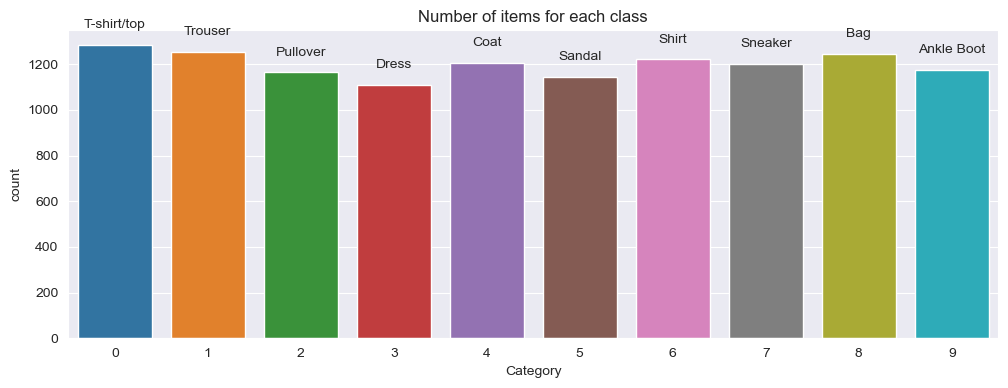

In [51]:
plot_count_per_class(np.argmax(y_val,axis=1))

In [52]:
get_count_per_class(np.argmax(y_val,axis=1))


T-shirt/top         :   1284 or 10.70%
Trouser             :   1255 or 10.46%
Pullover            :   1164 or 9.70%
Dress               :   1109 or 9.24%
Coat                :   1204 or 10.03%
Sandal              :   1145 or 9.54%
Shirt               :   1221 or 10.17%
Sneaker             :   1202 or 10.02%
Bag                 :   1243 or 10.36%
Ankle Boot          :   1173 or 9.78%


Both the train and validation set are unbalanced with respect of distribution of classes. 

## <a id="52">Train the model</a>

### Build the model   



We will use a **Sequential** model.
* The **Sequential** model is a linear stack of layers. It can be first initialized and then we add layers using **add** method or we can add all layers at init stage. The layers added are as follows:

* **Conv2D** is a 2D Convolutional layer (i.e. spatial convolution over images). The parameters used are:
 * filters - the number of filters (Kernels) used with this layer; here filters = 32;
 * kernel_size - the dimmension of the Kernel: (3 x 3);
 * activation - is the activation function used, in this case `relu`;
 * kernel_initializer - the function used for initializing the kernel;
 * input_shape - is the shape of the image presented to the CNN: in our case is 28 x 28
 The input and output of the **Conv2D** is a 4D tensor.
 
* **MaxPooling2D** is a Max pooling operation for spatial data. Parameters used here are:
 * *pool_size*, in this case (2,2), representing the factors by which to downscale in both directions;
 
 * **Conv2D** with the following parameters:
 * filters: 64;
 * kernel_size : (3 x 3);
 * activation : `relu`;
 
* **MaxPooling2D** with parameter:
 * *pool_size* : (2,2);

* **Conv2D** with the following parameters:
 * filters: 128;
 * kernel_size : (3 x 3);
 * activation : `relu`;
 
* **Flatten**. This layer Flattens the input. Does not affect the batch size. It is used without parameters;

* **Dense**. This layer is a regular fully-connected NN layer. It is used without parameters;
 * units - this is a positive integer, with the meaning: dimensionality of the output space; in this case is: 128;
 * activation - activation function : `relu`;
 
* **Dense**. This is the final layer (fully connected). It is used with the parameters:
 * units: the number of classes (in our case 10);
 * activation : `softmax`; for this final layer it is used `softmax` activation (standard for multiclass classification)
 

Then we compile the model, specifying as well the following parameters:
* *loss*;
* *optimizer*;
* *metrics*. 


In [54]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input


In [55]:

# Model
model = Sequential()
# Add an Input layer
model.add(Input(shape=(IMG_ROWS, IMG_COLS, 1)))  # Define the input shape here
# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


### Inspect the model

Let's check the model we initialized.

In [56]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

Let's also plot the model

In [66]:
import pydot
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import model_to_dot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [68]:
plot_model(model, to_file='model.png')
#SVG(model_to_dot(model).create(prog='dot', format='svg'))

You must install pydot (`pip install pydot`) for `plot_model` to work.


### Run the model

We run the model with the training set. We are also using the validation set (a subset from the orginal training set) for validation.

In [69]:
train_model = model.fit(X_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=NO_EPOCHS,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.7383 - loss: 0.7246 - val_accuracy: 0.8629 - val_loss: 0.3768
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.8746 - loss: 0.3449 - val_accuracy: 0.8806 - val_loss: 0.3283
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.8964 - loss: 0.2885 - val_accuracy: 0.8953 - val_loss: 0.2957
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9105 - loss: 0.2477 - val_accuracy: 0.9018 - val_loss: 0.2716
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9200 - loss: 0.2191 - val_accuracy: 0.9048 - val_loss: 0.2696
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9267 - loss: 0.1974 - val_accuracy: 0.9070 - val_loss: 0.2720
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9384 - loss: 0.1679 - val_accuracy: 0.9094 - val_loss: 0.2559
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9426 - loss: 0.1546 - val_acc

## <a id="53">Test prediction accuracy</a>

We calculate the test loss and accuracy.

In [70]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6915722489356995
Test accuracy: 0.9151999950408936


Test accuracy is  around  0.91.

We evaluated the model accuracy based on the predicted values for the test set.  Let's check the validation value during training.



## <a id="55">Add Dropout layers to the model</a>

We add several Dropout layers to the model, to help avoiding overfitting.    
Dropout is helping avoid overfitting in several ways, as explained in <a href='#8'>[6]</a> and <a href='#8'>[7]</a>.  


In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Input
import keras

# Assuming IMG_ROWS, IMG_COLS, and NUM_CLASSES are defined.
IMG_ROWS = 28  # Placeholder value, set according to your data specifics
IMG_COLS = 28  # Placeholder value, set according to your data specifics
NUM_CLASSES = 10  # Placeholder value, adjust according to the number of your classes

# Model
model = Sequential()
# Add an Input layer explicitly defining the input shape
model.add(Input(shape=(IMG_ROWS, IMG_COLS, 1)))
# Add convolution 2D without the input_shape argument
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal'))
model.add(MaxPooling2D((2, 2)))
# Add dropouts to the model
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add dropouts to the model
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
# Add dropouts to the model
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# Add dropouts to the model
model.add(Dropout(0.3))
model.add(Dense(NUM_CLASSES, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


## <a id="56">Re-train the model</a>

Let's inspect first the model.

In [75]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

Let's also plot the model.

In [76]:
plot_model(model, to_file='model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

You must install pydot (`pip install pydot`) for `plot_model` to work.


ImportError: You must install pydot (`pip install pydot`) for model_to_dot to work.

And now let's run the new model.

In [77]:
train_model = model.fit(X_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=NO_EPOCHS,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.5965 - loss: 1.0979 - val_accuracy: 0.8266 - val_loss: 0.4686
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.8066 - loss: 0.5146 - val_accuracy: 0.8603 - val_loss: 0.3818
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.8413 - loss: 0.4292 - val_accuracy: 0.8766 - val_loss: 0.3395
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.8572 - loss: 0.3855 - val_accuracy: 0.8834 - val_loss: 0.3129
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.8675 - loss: 0.3571 - val_accuracy: 0.8938 - val_loss: 0.2917
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.8768 - loss: 0.3359 - val_accuracy: 0.8956 - val_loss: 0.2910
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.8852 - loss: 0.3165 - val_accuracy: 0.8993 - val_loss: 0.2760
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.8896 - loss: 0.3011 - val_

## <a id="57">Prediction accuracy with the new model</a>

Let's re-evaluate the prediction accuracy with the new model.

In [78]:
plot_accuracy_and_loss(train_model)

KeyError: 'acc'

After adding the Dropout layers, the validation accuracy and validation loss are much better. Let's check now the prediction for the test set.


## <a id="58">Prediction accuracy with the new model</a>

Let's re-evaluate the test prediction accuracy with the new model.

In [83]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.20500676333904266
Test accuracy: 0.9265000224113464


Also the test accuracy improved. The test accuracy is now approximately 0.93.

In [84]:
import numpy as np

# Get the predictions for the test data
predictions = model.predict(X_test)

# Convert probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Get the indices to be plotted (true class labels)
y_true = test_data.iloc[:, 0]


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [85]:
p = predicted_classes[:10000]
y = y_true[:10000]
correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]

In [90]:
print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])
print("% incorrect predicted classes:",(100 - (100* (correct.shape[0]-incorrect.shape[0])/correct.shape[0])))

Correct predicted classes: 9265
Incorrect predicted classes: 735
% incorrect predicted classes: 7.933081489476521


In [91]:
target_names = ["Class {} ({}) :".format(i,labels[i]) for i in range(NUM_CLASSES)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

                         precision    recall  f1-score   support

Class 0 (T-shirt/top) :       0.84      0.91      0.87      1000
    Class 1 (Trouser) :       0.99      0.99      0.99      1000
   Class 2 (Pullover) :       0.90      0.89      0.89      1000
      Class 3 (Dress) :       0.92      0.95      0.93      1000
       Class 4 (Coat) :       0.88      0.90      0.89      1000
     Class 5 (Sandal) :       1.00      0.97      0.98      1000
      Class 6 (Shirt) :       0.83      0.72      0.77      1000
    Class 7 (Sneaker) :       0.96      0.96      0.96      1000
        Class 8 (Bag) :       0.99      0.99      0.99      1000
 Class 9 (Ankle Boot) :       0.96      0.98      0.97      1000

               accuracy                           0.93     10000
              macro avg       0.93      0.93      0.93     10000
           weighted avg       0.93      0.93      0.93     10000




The best accuracy is obtained for Class 1, Class 5, Class 8, Class 9  and Class 7. Worst accuracy is for Class 6.   

The recall is highest for Class 8, Class 5 and smallest for Class 6 and Class 4.    

f1-score is highest for Class 1, Class 5 and Class 8 and smallest for Class 6 followed by Class 4 and Class 2.  

Let's also inspect some of the images. We created two subsets of the predicted images set, correctly and incorrectly classified.

# <a id="6">Visualize classified images</a>

## <a id="61">Correctly classified images</a>


We visualize few images correctly classified.

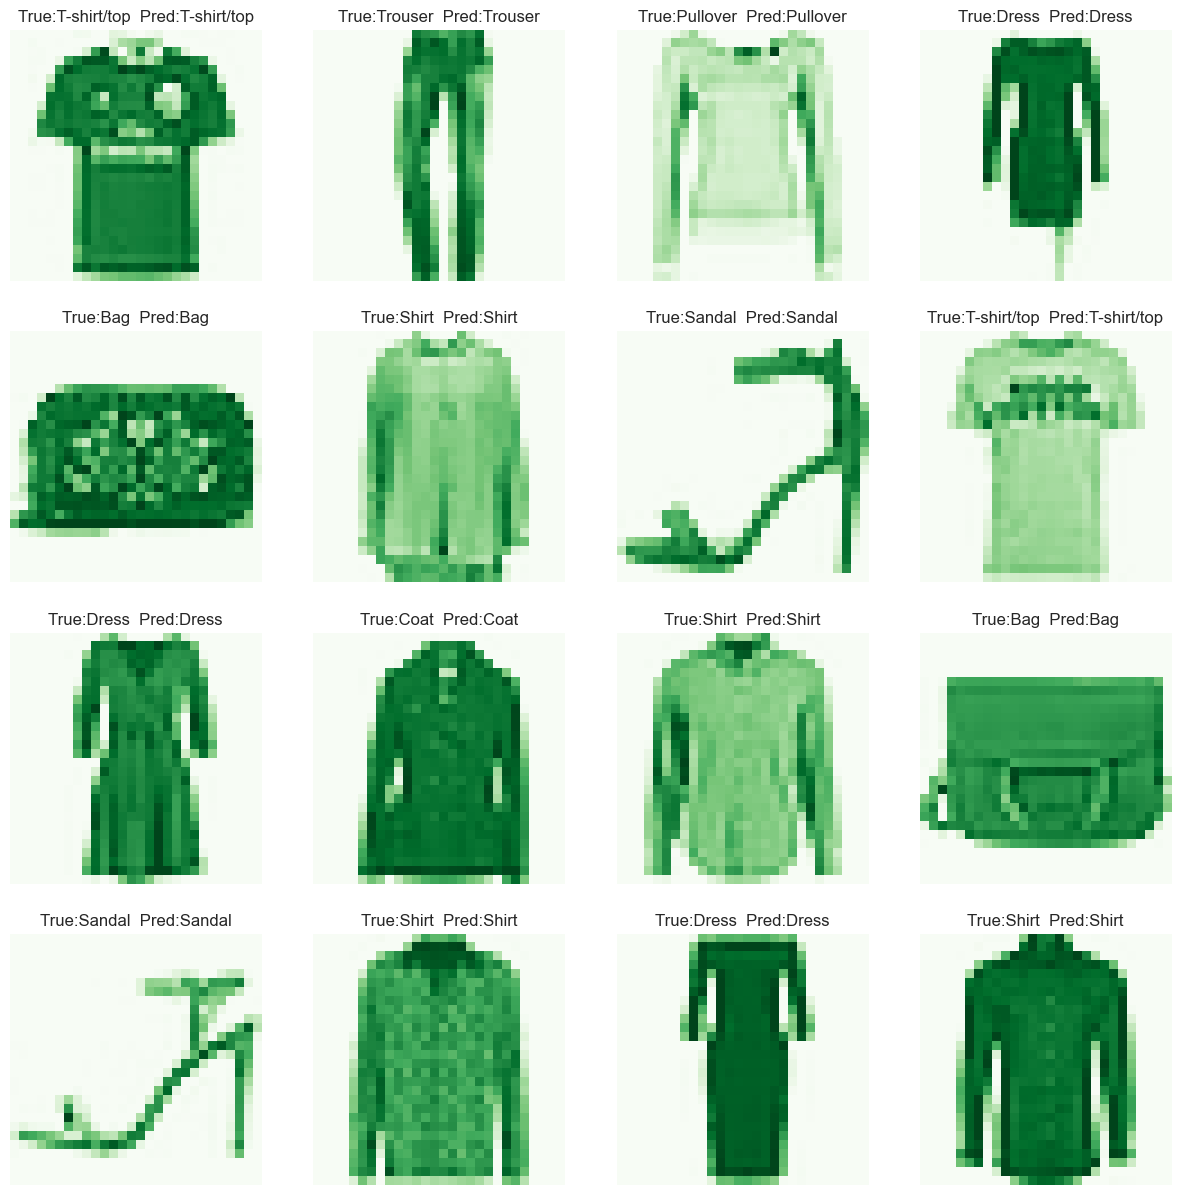

In [92]:
def plot_images(data_index,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(4,4, figsize=(15,15))

    for i, indx in enumerate(data_index[:16]):
        ax[i//4, i%4].imshow(X_test[indx].reshape(IMG_ROWS,IMG_COLS), cmap=cmap)
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title("True:{}  Pred:{}".format(labels[y_true[indx]],labels[predicted_classes[indx]]))
    plt.show()    
    
plot_images(correct, "Greens")

## <a id="62">Incorrectly classified images</a>

Let's see also few images incorrectly classified.

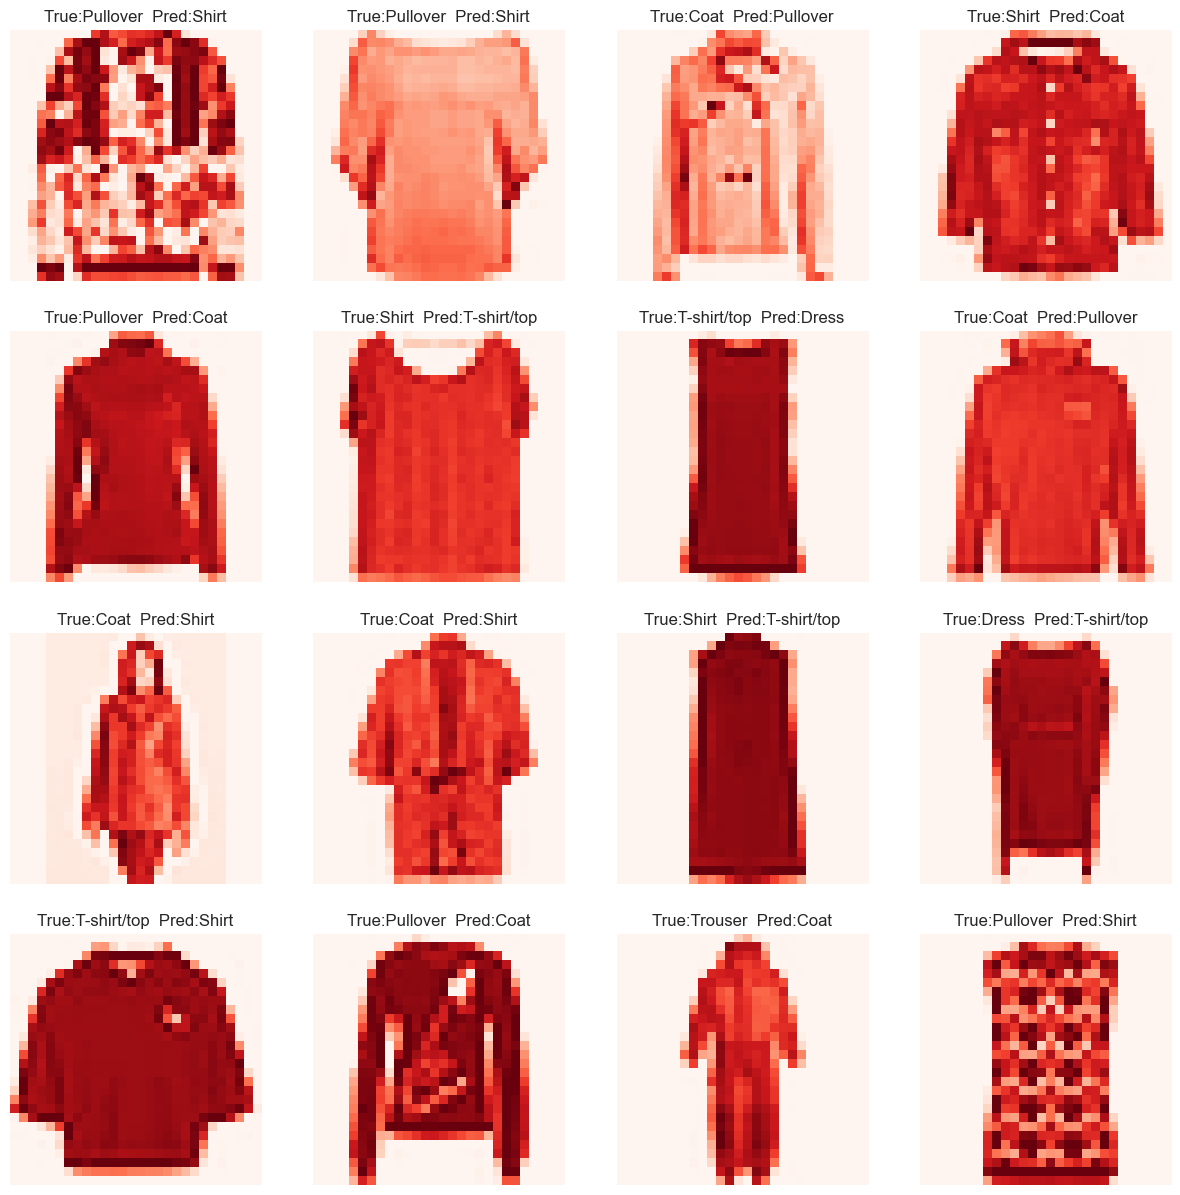

In [93]:
plot_images(incorrect, "Reds")

# <a id="7">Conclusions</a>

With a complex sequential model with multiple convolution layers and 50 epochs for the training, we obtained an accuracy ~0.91 for test prediction.
After investigating the validation accuracy and loss, we understood that the model is overfitting.   
We retrained the model with Dropout layers to the model to reduce overfitting.  
We confirmed the model improvement and with the same number of epochs for the training we obtained with the new model an accuracy of ~0.93 for test prediction. Only few classes are not correctly classified all the time, especially Class 6 (Shirt) and Class 2 (Pullover).

# <a id="8">References</a>

[1] Fashion MNIST, An MNIST-like dataset of 70,000 28x28 labeled fashion images, https://www.kaggle.com/zalando-research/fashionmnist  
[2] DanB, CollinMoris, Deep Learning From Scratch, https://www.kaggle.com/dansbecker/deep-learning-from-scratch  
[3] DanB, Dropout and Strides for Larger Models, https://www.kaggle.com/dansbecker/dropout-and-strides-for-larger-models  
[4] BGO, CNN with Keras, https://www.kaggle.com/bugraokcu/cnn-with-keras    
[5] NAIN, EagerFMINST, https://www.kaggle.com/aakashnain/eagerfmnist  
[6] Why Dropounts prevent overfitting in Deep Neural Networks, https://medium.com/@vivek.yadav/why-dropouts-prevent-overfitting-in-deep-neural-networks-937e2543a701  
[7] Dropout: A Simple Way to Prevent Neural Networks from Overfitting, https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf  

# Testing Model with new images 

In [125]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [134]:

# Function to load and prepare the image in the same way as MNIST data
def load_and_prepare_image(filepath, img_rows, img_cols):
    # Load the image
    img = Image.open(filepath).convert('L')  # Convert to grayscale using PIL
    img = img.resize((img_rows, img_cols), Image.Resampling.LANCZOS)  # Resize the image
    img = np.array(img)  # Convert the image to numpy array

    # Rescale the image
    img = img.astype('float32') / 255.0

    # Reshape the image - model expects data to have shape: [batch_size, img_rows, img_cols, channels]
    img = img.reshape(1, img_rows, img_cols, 1)
    return img

# Function to print the image
def print_image(img_array):
    img_array = img_array.squeeze()  # Remove single-dimensional entries from the shape
    plt.imshow(img_array, cmap='gray')  # Show the image in grayscale
    plt.axis('off')  # Hide the axis
    plt.show()



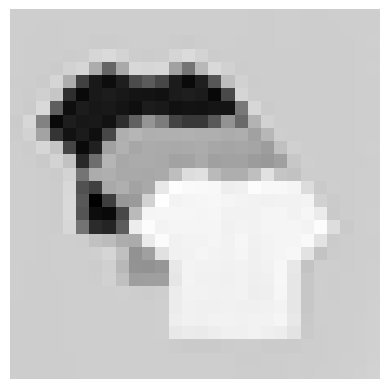

In [138]:

# Example usage:
filepath = './images/GUEST_7746c7c6-9bb4-4d56-9749-f3839ede0702.jpeg'  # Path to the uploaded image
img_rows, img_cols = 28, 28  # MNIST image dimensions
prepared_image = load_and_prepare_image(filepath, img_rows, img_cols)

# Now, let's print the prepared image to see what it looks like
print_image(prepared_image)

In [139]:
predictions_new = model.predict(prepared_image)
predicted_class = np.argmax(predictions_new, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [140]:
print("Predicted class:", labels[predicted_class[0]])


Predicted class: Bag
